# PRACTICAL SESSION 2:
Simulating truncated homogeneous sphere gravitational collapse

## MODULES IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as const
from astropy import units as u

In [2]:
# Setting the random number generator

rng = np.random.default_rng()

# 1 - INPUT GENERATION:
Sampling N p.cles in an homegeneous sphere of mass M and radius R. Studied systems are the following:

    V01 - Sun with 100 p.cles and units of solar mass, solar radius and minutes.
    V02 - 

In [36]:
file_in = 'IF_V01.txt'

In [3]:
# UNITS

# Chosen units (same name as in astropy https://docs.astropy.org/en/stable/units/#module-astropy.units.astrophys)

my_u = ["R_sun","min","M_sun"]

# Physical constants converted to chosen units

G = const.G.to(my_u[0] + "^3/(" + my_u[1] + "^2 " + my_u[2] + ")").value
c = const.c.to(my_u[0] + "/" + my_u[1]).value

# Normalization constants to go from physical units to internal units

R0 = 1 # solar radii
T0 = 1 # min
M0 = R0**3 / (G * T0**2)

In [4]:
# INITIAL CONDITIONS

N = 100 # number of p.cles
M = 1   # total mass (solar masses)
R = 1   # radius (solar radii)

# Masses
m = M / N * np.ones(N)

# Positions
phi = 2 * np.pi * rng.uniform(size=N)
the = np.arccos(1 - 2 * rng.uniform(size=N))
rho = R * rng.uniform(size=N)**(1/3)

x = rho * np.sin(the) * np.cos(phi)
y = rho * np.sin(the) * np.sin(phi)
z = rho * np.cos(the)

# Velocities
vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

In [39]:
m = m / M0

x = x / R0
y = y / R0
z = z / R0

vx = vx / R0 * T0
vy = vy / R0 * T0
vz = vz / R0 * T0

time_in = 0 # initial time

output = np.column_stack((m, x, y, z, vx, vy, vz))
with open(file_in, 'w') as file:
    file.write(f'{N}\n')
    file.write(f'{time_in}\n')
    np.savetxt(file, output)

# 2 - DATA ANALYSIS:
The expected collapse time is $t_c = \sqrt{\frac{3\pi}{32G\rho}}$. For the Sun $t_c = 29.5$ min.

In [8]:
file_out = 'OF_V01.txt'

n = N + 2 # 'block' length
m = 2     # number of rows to skip (i.e. lines containing n. bodies and time)

time_rows = []
data_rows = []
with open(file_out, "r") as file:
    lines = file.readlines()
    for i in range(0, len(lines), n):  # move through rows every n rows
        time_rows.extend(lines[i+1:i+m])
        data_rows.extend(lines[i+m:i+n])

time = np.loadtxt(time_rows)
data = np.loadtxt(data_rows)

In [9]:
# Fetching data

m = data[:, 0] # masses

r = data[:, 1:4] # positions
d = np.linalg.norm(r, axis=1) # distance from center

v = data[:, 4:7] # velocities

d.shape

(5000,)

Text(0, 0.5, 'distance from center [R$_{\\odot}$]')

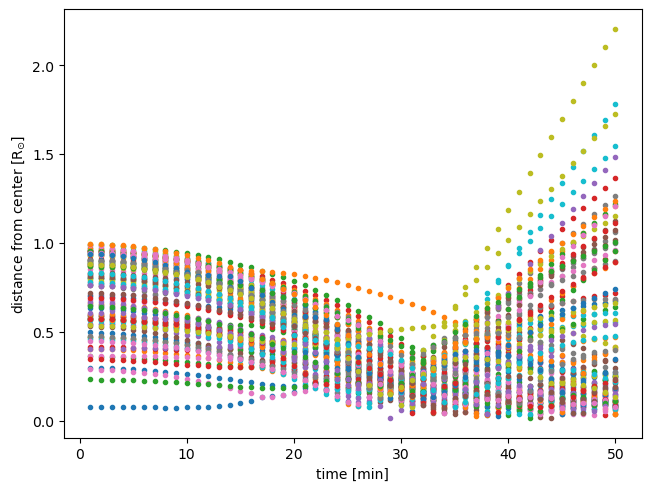

In [10]:
fig, ax = plt.subplots(1, 1, layout='constrained')

for i in range(N):
    ax.plot(time, d[i::N], '.')

ax.set_xlabel('time [min]')
ax.set_ylabel('distance from center [R$_{\odot}$]')

In [23]:
d_mtx = d.reshape((time.size, N)) # reshaping d in a matrix | d[:, i] contains the distance of the i p.cle at each instant

index = np.argmin(d_mtx, axis=0)
time_min = np.array([time[i] for i in index])

print(time_min.mean() * T0)

1.724016914029369


In [19]:
index = np.argmax(d_mtx[-1])
print(d_mtx[0, index])

0.8746358352616317


In [22]:
index = np.argmax(d_mtx[0])
print(index, d_mtx[0, index], d_mtx[-1, index])

61 0.9847809029941835 6.138347492027458


In [36]:
d_mtx.min(axis=0)

array([0.08463643, 0.03381775, 0.07582448, 0.02355109, 0.01395145,
       0.02069445, 0.04211497, 0.04351565, 0.07274897, 0.05037627,
       0.09565168, 0.15114249, 0.03388045, 0.06020273, 0.05148197,
       0.04016133, 0.05092463, 0.11847693, 0.08458955, 0.04618585,
       0.16488261, 0.04874757, 0.16826292, 0.02432317, 0.19760569,
       0.06200553, 0.09224383, 0.05945511, 0.05389854, 0.10972929,
       0.08068752, 0.04750249, 0.03642455, 0.15337163, 0.04387655,
       0.03428833, 0.02894012, 0.12590732, 0.06053872, 0.10365777,
       0.06875972, 0.14032886, 0.06469803, 0.04558938, 0.05324123,
       0.05158424, 0.01439839, 0.12360281, 0.01218959, 0.03908995,
       0.07963284, 0.07283427, 0.06656525, 0.04464668, 0.10948536,
       0.05189459, 0.08028464, 0.06057302, 0.08653275, 0.11389158,
       0.07515353, 0.04938305, 0.02969352, 0.05044682, 0.09860102,
       0.04312353, 0.06288039, 0.08365267, 0.12291839, 0.04332258,
       0.03277273, 0.10614318, 0.05135978, 0.02782201, 0.05061